# Testing the following modules:
   1. [Preprocessing](#presprocessing)
   2. [Processing](#processing)
   3. [Visualizing](#visualizing)
   4. [Feature Extraction](#feature_extraction)
   5. [Training](#training)
   6. [Testing](#testing)
   
## but first we need to import them and some other libraries:

In [1]:
# importing the calsses:
from PreProcessing.Data_Prepare import DataPrepare
from PreProcessing.Files_manager import FilesManager
from Processing.Filter import Filters
from Processing.analysis import staticSpectralAnalysis
from Processing.analysis import multivariateComponentsAnalysis
from Visualizing.visualizing import graphs
from ML_models.Models import ML_models , ConfusionMatrix
import matplotlib.pyplot as plt
import pandas as pd
import time

#importing other libraries:
import os
import glob
import csv

In [2]:
pca_path = "D:/Graduation Project/Brain-controlled-wheelchair-with-self-driving-mode/PCA_models/"
models_path = "D:/Graduation Project/Brain-controlled-wheelchair-with-self-driving-mode/trained_MLModels/"
unTunedModel_name = "un_tuned_model_Alaa_10_8_2023"
pca_name = "pca_Alaa_10_8_2023.sav"

## <a name = "presprocessing"></a>Preprocessing
in this step we prepare the data for the further steps as processing and so on
preparation of the data will go through 3 steps:
1. making an object from the DataPrepare class:

In [3]:
prepare = DataPrepare()

2. seeting the directory where the data exists

In [4]:
dir_ = os.path.abspath("D:\Graduation Project\Brain-controlled-wheelchair-with-self-driving-mode\BCI_ssvep_Training\SSVEP Data (BrainWheel)")
requiredFolder = "/subject_5"
files = "/U0000[a | b | c | d | e | f | g | h | i | j | k]*.csv" #this will get all the paths of the files in this folder as a list of paths
# paths = dir_+ requiredFolder + files
paths = r"D:\Graduation Project\Brain-controlled-wheelchair-with-self-driving-mode\recorded_Data\Train\Alaa_12_7_2023.csv"

3. getting the data from the required folder and preparing it

In [5]:
raw_data = prepare.get_DataFromFiles(glob.glob(paths), concat = True)

### here will be the result of the preprocessing step
a) shape of the data after concatination

In [6]:
raw_data.shape

(44800, 15)

In [7]:
data_for_test = raw_data.drop(columns = "Label")
test_file_path = "D:/Graduation Project/Brain-controlled-wheelchair-with-self-driving-mode/recorded_Data/Real_time/offline/"
test_file_name = "Alaa_10_8_2023.csv"
# Open a file in write mode
data_for_test.to_csv(test_file_path+test_file_name, index=False)

b) the first five rows of the data

In [8]:
raw_data.head(); # if u need to see the first five rows just ** Erase the semi colon " ; " **

## <a name = "processing"></a>Processing
this will go through 3 steps that are:
* [CAR](#car)
* [Filtering](#filtering)
* [Welch's method](#welch's_method)

but first we should make objects from the classes: Filters, staticSpectralAnalysis

In [9]:
fltr = Filters()
analysis = staticSpectralAnalysis()

### <a name = "car"></a>CAR

In [10]:
data_car = analysis.CAR(raw_data.copy())

### <a name="filtering"></a>Filtering

In [11]:
data_filter = fltr.butter_bandpassFilter(data_car.copy() , 5 , 40) # 5: low cut, 40: high cut

In [12]:
data_filter.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Label
0,-0.040139,0.201424,0.002645,0.007034,-0.102986,-0.076078,0.073136,0.049779,0.006923,-0.120065,0.091454,-0.023733,0.091550,-0.054442,7.5
1,0.521600,-1.036599,0.881248,19.552889,-0.719386,-3.198485,-4.132669,-0.557931,-0.934562,-1.802816,-0.699062,-4.230186,-2.768987,1.608588,7.5
2,-2.207042,3.507204,-0.558189,18.607733,3.221743,-4.661283,-4.062279,-2.616953,-3.803185,2.327395,-2.347967,-6.946228,-4.186725,2.314295,7.5
3,-3.917794,2.817244,-2.605201,6.804119,4.975999,-4.441253,-1.014561,-3.156771,-4.403506,5.318707,-2.445739,-5.128430,-0.734768,3.148818,7.5
4,-2.584844,-7.764970,-3.023320,6.477937,2.948637,-1.989245,1.089969,-1.348323,-1.641304,3.821429,-3.547607,-0.833061,2.070158,2.772128,7.5


## ICA

In [13]:
# from sklearn.decomposition import FastICA

# data_filter_label = data_filter["Label"]

# data_filter_without_label = data_filter.drop(columns = "Label")
# data_filter_columns_names = data_filter_without_label.columns

# # Perform ICA
# ica = FastICA(n_components=14)
# data_ICA = ica.fit_transform(data_filter)
# data_ICA = pd.DataFrame(data_ICA)
# data_ICA.columns = data_filter_columns_names
# data_ICA["Label"] = data_filter_label

### <a name = "welch's_method"></a>Welch's method

In [14]:
time_of_single_trial = 5
# data_welch = analysis.welch_file(data_ICA.copy() , time_of_single_trial)

data_welch = analysis.welch_file(data_filter.copy() , time_of_single_trial)

C:\Users\youss\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## <a name = "visualizing"></a>Visualizing
* [Raw data](#raw_data)
* [Data after CAR](#car_data)
* [Filtered data](#filter_data)
* [Welch's output](#welch)

but their are two steps to do at first:
1. make an object of the class: graphs
2. extract trials to visualize one trial to be more clear

In [15]:
# 1
graph = graphs()

### <a name = "raw_data"></a>Raw data

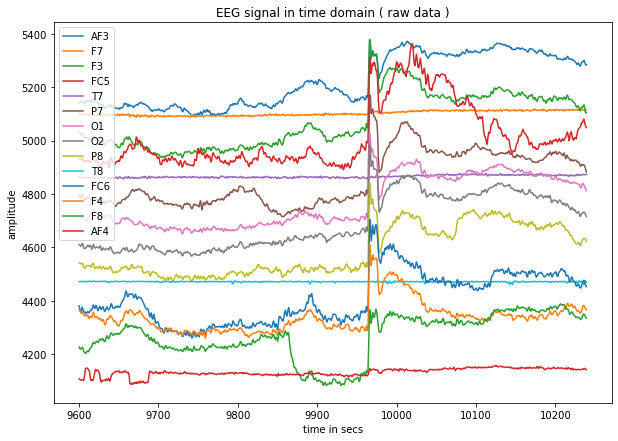

In [16]:
extracted_trials = prepare.extractTrials(raw_data.copy() , time_of_single_trial)
graph.TIME_visualizationOfAllElectrodes(extracted_trials[15] , "raw data")

### <a name = "car_data"></a>Data after CAR

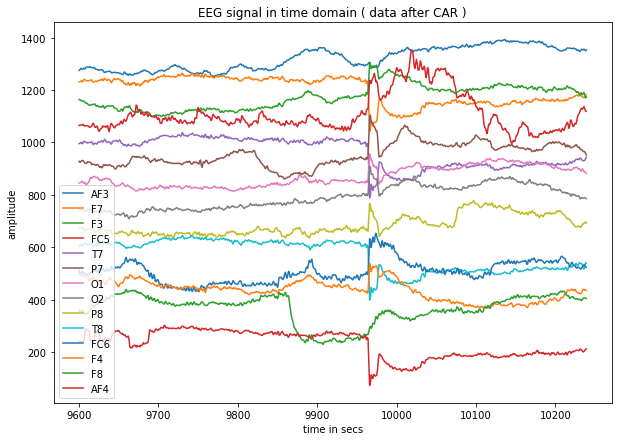

In [17]:
extracted_trials = prepare.extractTrials(data_car.copy() , time_of_single_trial)
graph.TIME_visualizationOfAllElectrodes(extracted_trials[15] , "data after CAR")

### <a name = "filter_data"></a>Filtered data

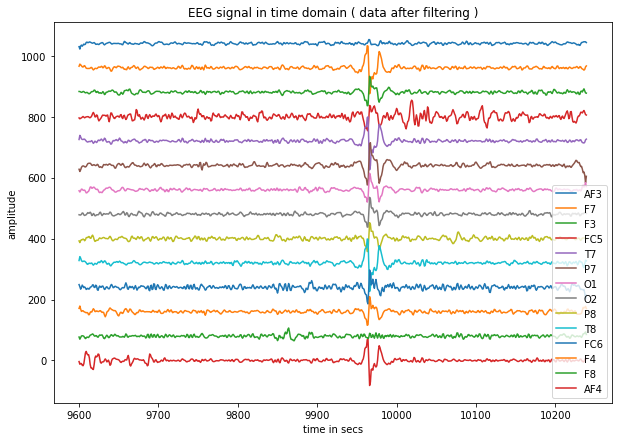

In [18]:
extracted_trials = prepare.extractTrials(data_filter.copy() , time_of_single_trial)
graph.TIME_visualizationOfAllElectrodes(extracted_trials[15] , "data after filtering")

## ICA output

In [19]:
# extracted_trials = prepare.extractTrials(data_ICA.copy() , time_of_single_trial)
# graph.TIME_visualizationOfAllElectrodes(extracted_trials[10] , "data after filtering")

### <a name = "welch"></a>Welch's output

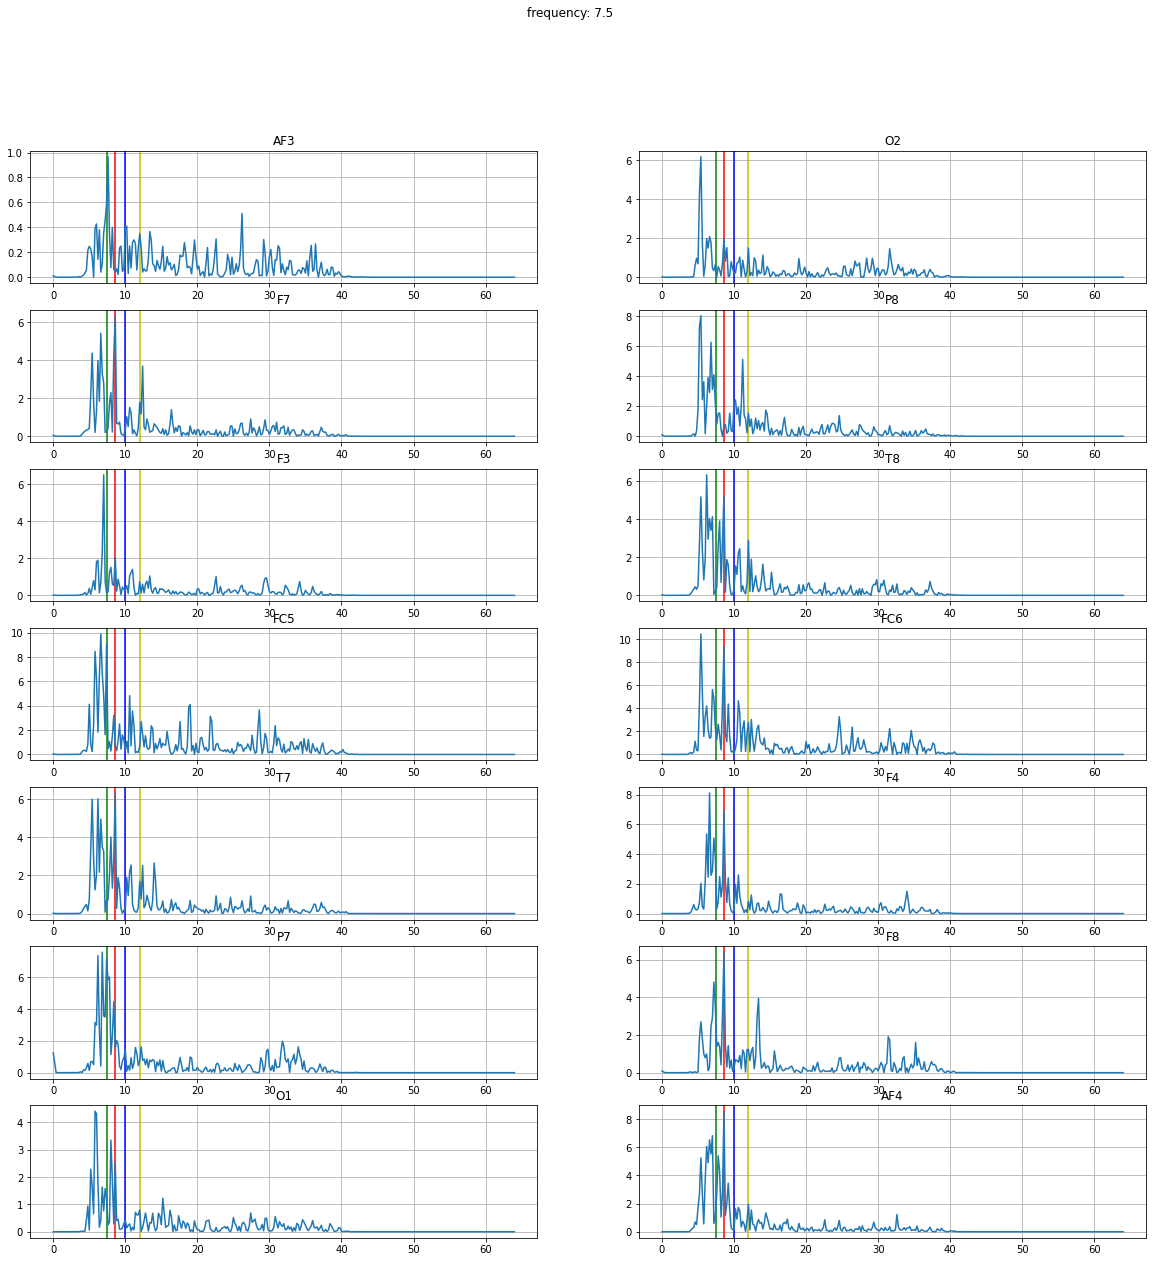

In [20]:
f , p_xx , label_ = analysis.welch(extracted_trials[15] , visualize = True)
graph.FREQ_ofSpecificChannels(f , p_xx , label_ )

## <a name = "feature_extraction"></a>Feature Extraction

In [22]:
(Features ,Labels) = analysis.featureExtraction_welch(data_welch.copy(), 3,[ 'O1', 'O2']) #['P7', 'O1', 'O2', 'P8', 'T8', 'AF4']

## <a name = "training"></a>Training
 1. Label Incoder
 2. PCA
 3. Train MachineLearning Models
 <br>
     a. Logistic Regression
 <br>
     b. SVC
<br>
     c. Random Forest
<br>
     d. Decision Tree

In [24]:
pca_analysis = multivariateComponentsAnalysis()

Label Incoder

In [25]:
x_train, x_test, y_train, y_test = pca_analysis.labelEncoder(Features , Labels)

PCA

In [28]:
x_train , x_test = pca_analysis.pca(x_train , x_test , pca_path, fileName = pca_name)

Train MachineLearning Models

In [29]:
ML_models = ML_models()

In [30]:
Train_without_tuning = ML_models.Train_without_tuning(x_train , 
                                                      y_train , 
                                                      x_test , 
                                                      y_test , 
                                                      path =models_path, 
                                                      name = unTunedModel_name)

this before tuning the models using GridSearchCV:

Class LogisticRegression:
    train: 0.6428571428571429
    valid: 0.14285714285714285

Class SVC:
    train: 0.5892857142857143
    valid: 0.14285714285714285

Class DecisionTreeClassifier:
    train: 1.0
    valid: 0.42857142857142855



C:\Users\youss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\youss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Class RandomForestClassifier:
    train: 1.0
    valid: 0.21428571428571427



UnTuned Models

In [31]:
unTunedModel = ML_models.load_MLModel(models_path , unTunedModel_name)

**Random forest:**

In [50]:
from sklearn.ensemble import RandomForestClassifier

test_model = RandomForestClassifier()
test_model.fit(x_train, y_train)
print("train_score",test_model.score(x_train, y_train))
print("test_score",test_model.score(x_test, y_test))
ML_models.save_MLModel(test_model , path = models_path , name = "RF_" + "Alaa_10_8_2023")

train_score 1.0
test_score 0.21428571428571427


**Decision tree:**

In [33]:
from sklearn.tree import DecisionTreeClassifier

test_model = DecisionTreeClassifier()
test_model.fit(x_train, y_train)
print("train_score",test_model.score(x_train, y_train))
print("test_score",test_model.score(x_test, y_test))
ML_models.save_MLModel(test_model , path = models_path , name = "DT_" + "Alaa_10_8_2023")

train_score 1.0
test_score 0.35714285714285715


In [34]:
# ConfusionMatrix(unTunedModel , x_test , y_test)

**Logistic Regression:**

In [35]:
start_time = time.time()
logisticRegression_GridSearch = ML_models.train_LogisticRegression_with_GridSearchCV(x_train , y_train , models_path , "Alaa_10_8_2023")
end_time = time.time()
LogisticRegression_elapsed_time = end_time - start_time
print(f"Logistic regression elapsed time {LogisticRegression_elapsed_time}")

Logistic regression elapsed time 0.20800185203552246


In [36]:
logisticRegression_trainScore = logisticRegression_GridSearch.score(x_train , y_train)
logisticRegression_testScore = logisticRegression_GridSearch.score(x_test , y_test)
print(f"logisticRegression Train score:\n{logisticRegression_trainScore}")
print(f"logisticRegression Test score:\n{logisticRegression_testScore}")

logisticRegression Train score:
0.6428571428571429
logisticRegression Test score:
0.21428571428571427


## <a name = "testing"></a>Testing

In [37]:
test_data = raw_data.iloc[24748:24876 , :]
print(test_data["Label"])
test_data.drop(columns = "Label" , inplace = True)
#test_data.head()

24748    7.5
24749    7.5
24750    7.5
24751    7.5
24752    7.5
        ... 
24871    7.5
24872    7.5
24873    7.5
24874    7.5
24875    7.5
Name: Label, Length: 128, dtype: float64


C:\Users\youss\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
test_data_CAR = analysis.CAR(test_data.copy())

In [39]:
test_data_FILTER = fltr.butter_bandpassFilter(test_data_CAR.copy() , 5 , 40 , train = False)

In [40]:
test_data_FILTER_col_names = test_data_FILTER.columns

In [41]:
# test_data_ICA = ica.fit_transform(test_data_FILTER)
# test_data_ICA = pd.DataFrame(test_data_ICA)
# test_data_ICA.columns = test_data_FILTER_col_names

In [42]:
test_data_welch = analysis.welch(test_data_FILTER.copy() , timeOfOneEpoch = 1 , train = False)

In [43]:
Pxx_den = test_data_welch[0]
Pxx_den[6][31:36]

array([1.39079259, 5.05971599, 2.18588879, 0.16614365, 1.71979652])

In [44]:
test_data_FEATURES = analysis.featureExtraction_welch(test_data_welch, 3,[ 'O1', 'O2'] , train = False)

In [45]:
len(test_data_FEATURES[0])

150

In [46]:
test_data_PCA = pca_analysis.expect_pca(test_data_FEATURES , pca_path , fileName = pca_name)

In [47]:
pred = ML_models.expect_LogisticRegression_with_GridSearchCV(test_data_PCA , path =models_path, userName =  "Alaa_10_8_2023")

predictions
 [0 0]


In [48]:
pred

7.5

In [49]:
test_model.predict(test_data_PCA)

array([1, 1], dtype=int64)

In [29]:
# ConfusionMatrix(logisticRegression_GridSearch , x_test , y_test)

In [30]:
len(x_train)

153

**SCV**

In [31]:
start_time = time.time()
SVC_GridSearch = ML_models.train_SVC_with_GridSearchCV(x_train , y_train , models_path , "trial20-5")
end_time = time.time()
SVC_elapsed_time = end_time - start_time
print(f"SVC elapsed time {SVC_elapsed_time}")


KeyboardInterrupt



In [ ]:
SVC_trainScore = SVC_GridSearch.score(x_train , y_train)
SVC_testScore = SVC_GridSearch.score(x_test , y_test)
print(f"SVC Train score:\n{SVC_trainScore}")
print(f"SVC Test score:\n{SVC_testScore}")

In [33]:
# ConfusionMatrix(SVC_GridSearch , x_test , y_test)

**Random Forest**

In [34]:
start_time = time.time()
RF_GridSearch = ML_models.train_RandomForest_with_GridSearchCV(x_train , y_train , models_path , "trial20-5")
end_time = time.time()
RF_elapsed_time = end_time - start_time
print(f"Random forest elapsed time {RF_elapsed_time}")

Random forest elapsed time 58.305185079574585


In [35]:
RF_trainScore = RF_GridSearch.score(x_train , y_train)
RF_testScore = RF_GridSearch.score(x_test , y_test)
print(f"RF Train score:\n{RF_trainScore}")
print(f"RF Test score:\n{RF_testScore}")

RF Train score:
1.0
RF Test score:
0.41025641025641024


In [36]:
# ConfusionMatrix(RF_GridSearch , x_test , y_test)

**Decision Tree**

In [ ]:
start_time = time.time()
DecisionTree_GridSearch = ML_models.train_DecisionTree_with_GridSearchCV(x_train , y_train , models_path , "trial20-5")
end_time = time.time()
DecisionTree_elapsed_time = end_time - start_time
print(f"Decision tree elapsed time {DecisionTree_elapsed_time}")

In [ ]:
DecisionTree_trainScore = DecisionTree_GridSearch.score(x_train , y_train)
DecisionTree_testScore = DecisionTree_GridSearch.score(x_test , y_test)
print(f"DecisionTree Train score:\n{DecisionTree_trainScore}")
print(f"DecisionTree Test score:\n{DecisionTree_testScore}")

**Bar Chart**
<br>
comparing between the models acording to the score in the test and train sets.

In [ ]:
import numpy as np

# set width of bar
barWidth = 0.25
fig , ax = plt.subplots(figsize =(12, 8))

# set height of bar
Train = [logisticRegression_trainScore , SVC_trainScore , RF_trainScore , DecisionTree_trainScore]
Train = [x*100 for x in Train]
Test = [logisticRegression_testScore , SVC_testScore , RF_testScore , DecisionTree_testScore] 
Test = [x*100 for x in Test]

# Set position of bar on X axis
br1 = np.arange(len(Train))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, Train, color ='r', width = barWidth,
    edgecolor ='grey', label ='Train')
plt.bar(br2, Test, color ='g', width = barWidth,
    edgecolor ='grey', label ='Test')


# Adding Xticks
plt.xlabel('Models'+"Trial20-5", fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Train))],
    ['LogisticRegression', 'SVC', 'RF', 'DecisionTree'])

# Set the grid property of the axes object to True
ax.grid(True)

plt.legend()
plt.show()
